 *Standardize the data
*calculate the eigen values and eigen vectors from the covariance matrix or correlatioj matrix, or perform singular vector decomposition.
*sort eigen values in descending order and choose the K eigen vectors that correspond to the largest eigen values where k is the number of dimensions of the new feature subspace(k<=d)
*construct the projection matrix W from selected k eigen vectors.
*transform the original dataset X via W to obtain a k-dimensional feature subspace Y

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [41]:
iris= load_iris()
X = iris.data
y = iris.target
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [42]:
X_std = StandardScaler().fit_transform(X)
print(X_std.shape)


(150, 4)


1- Eigen decomposition - Coputing Eigen vectors and Eigen values


The eigen vectors (principal components) determine the directions of the new feature, space and the eigen values determine the magnitude. In other words, the eigen values explain the variance of the data along the new feature axes.

In [43]:
import numpy as np
mean_vec= np.mean(X_std, axis=0)
print(mean_vec)
cov_mat= (X_std- mean_vec).T.dot((X_std - mean_vec))/(X_std.shape[0]-1)
print("Covariance matrix")
print(cov_mat)

[-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
Covariance matrix
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [44]:
#Alternative
cov_mat= np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

Find eigen values and eigen vectors

In [45]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigen vectors \n%s' %eig_vecs)
print('\n Eigen values \n%s' %eig_vals)

Eigen vectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

 Eigen values 
[2.93035378 0.92740362 0.14834223 0.02074601]


2- Selecting Principal Components
#write


In [46]:
#sort the eigen values in descending order
eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
for i in eig_pairs:
    print(i[0])

2.9303537755893188
0.9274036215173411
0.1483422264816396
0.020746013995596033


Explained Variance

In [47]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp)

[72.77045209380137, 23.030523267680625, 3.6838319576273815, 0.5151926808906346]


In [48]:
#what is cumsum?
li=[1,2,3,4,5]
print(np.cumsum(li))

[ 1  3  6 10 15]


In [49]:
cum_var_exp= np.cumsum(var_exp)

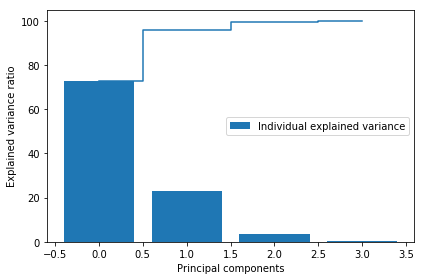

In [50]:
import matplotlib.pyplot as plt
plt.bar(range(4), var_exp, align='center', label='Individual explained variance')
plt.step(range(4), cum_var_exp, where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()


The plot above clearly shows that most of the variance(72.77% of the variance to be precise) can be explained by the first principal component alone. The second principal componet still bears

In [51]:
for i in eig_pairs:
    print(i)

(2.9303537755893188, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))
(0.9274036215173411, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))
(0.1483422264816396, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ]))
(0.020746013995596033, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))


In [52]:
#that's how hstack and vstack workk...
#not inclusive in PCA. just a random explaination

m1= np.arange(1,10,1).reshape(3,3)
m2=np.arange(3,12,1).reshape(3,3)
print(m1)
print(m2)
print(np.hstack([m1,m2]))
print(np.vstack([m1,m2]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 1  2  3  3  4  5]
 [ 4  5  6  6  7  8]
 [ 7  8  9  9 10 11]]
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [53]:
#take a sequence of arrays and stack them horizontally to make single array
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print(matrix_w)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


3- Projection onto the new feature space 
  In this last step we will use the 4x2 dimensional 

In [54]:
X_std.shape, matrix_w.shape

((150, 4), (4, 2))

In [55]:
Y = X_std.dot(matrix_w)

In [56]:
Y.shape

(150, 2)

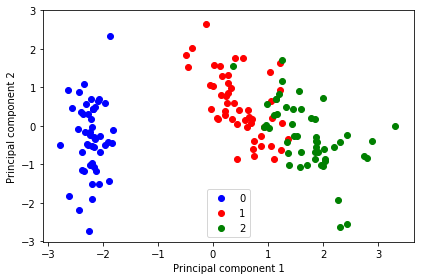

In [57]:
import numpy as np
from matplotlib import pyplot as plt
colors= ['blue','red','green']

for lab,col in zip(np.unique(y), colors):
    plt.scatter(Y[y==lab,0], Y[y==lab,1], label=lab, c=col)
    
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

Shortcut-PCA in scikit-learn


In [ ]:
pca = PCA